In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

sns.set(style='whitegrid')

df = pd.read_csv("seeds_dataset.txt", sep='\t+', engine='python', header=None)

df.columns = [
    'area', 'perimeter', 'compactness', 'kernel_length',
    'kernel_width', 'asymmetry_coefficient', 'groove_length', 'label'
]

df['label'] = df['label'].astype(int) - 1  # 0 = Kama, 1 = Rosa, 2 = Canadian
df.head()



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


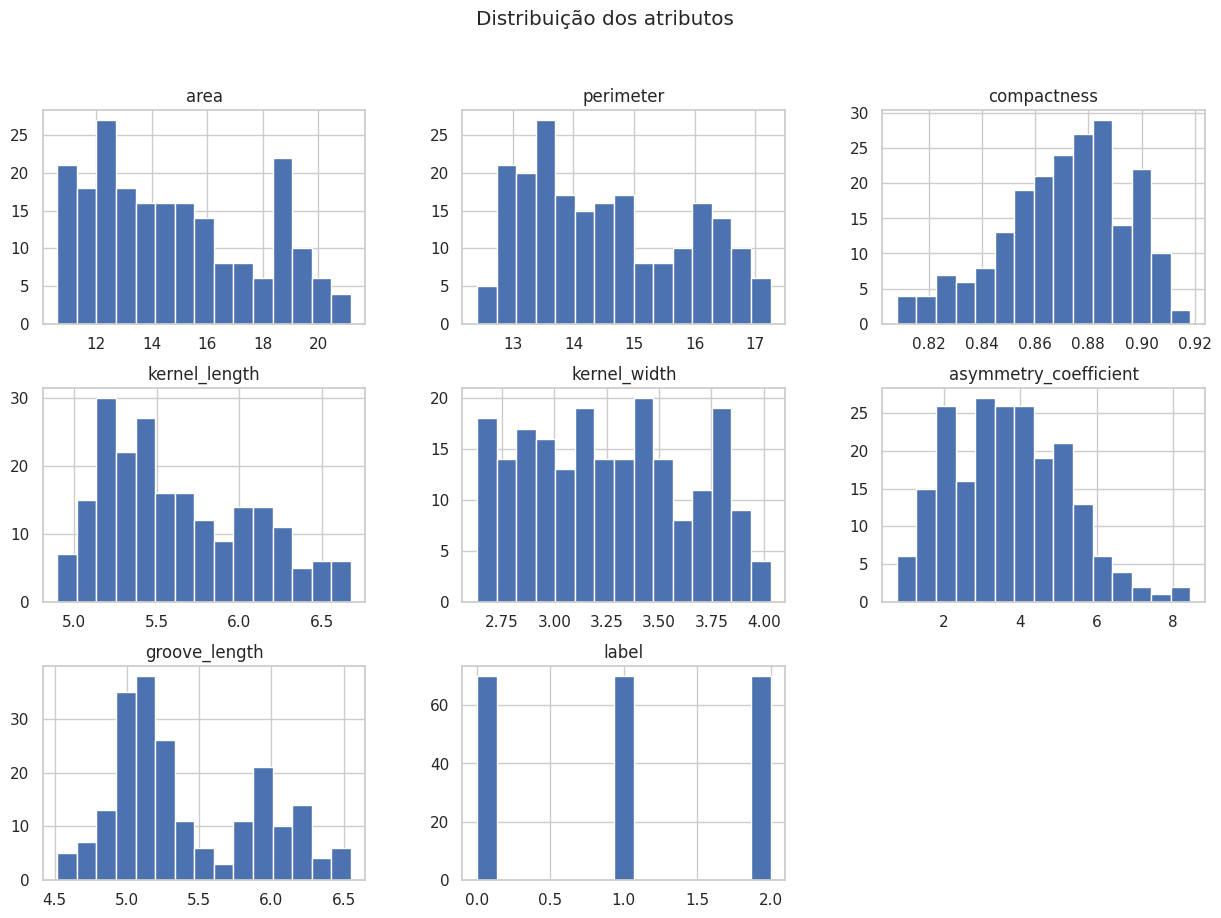

In [9]:
df.describe()

df.hist(bins=15, figsize=(15,10))
plt.suptitle('Distribuição dos atributos')
plt.show()

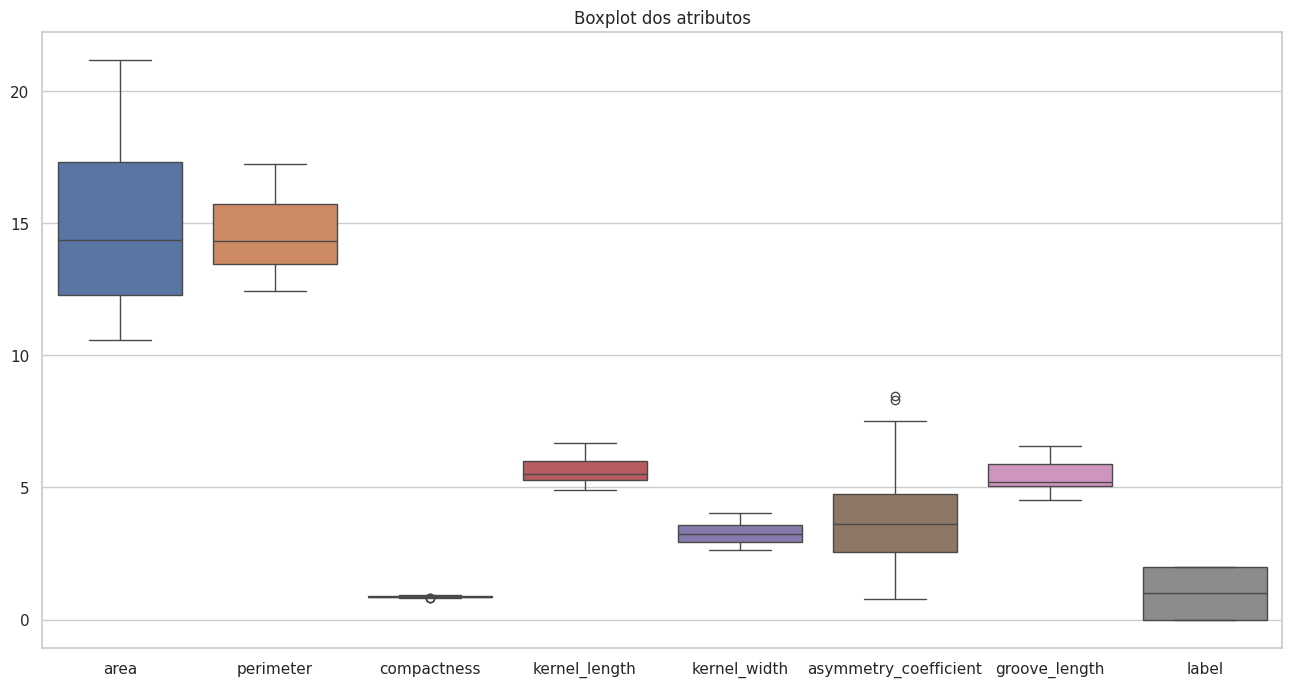

In [12]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df)
plt.title("Boxplot dos atributos")
plt.show()

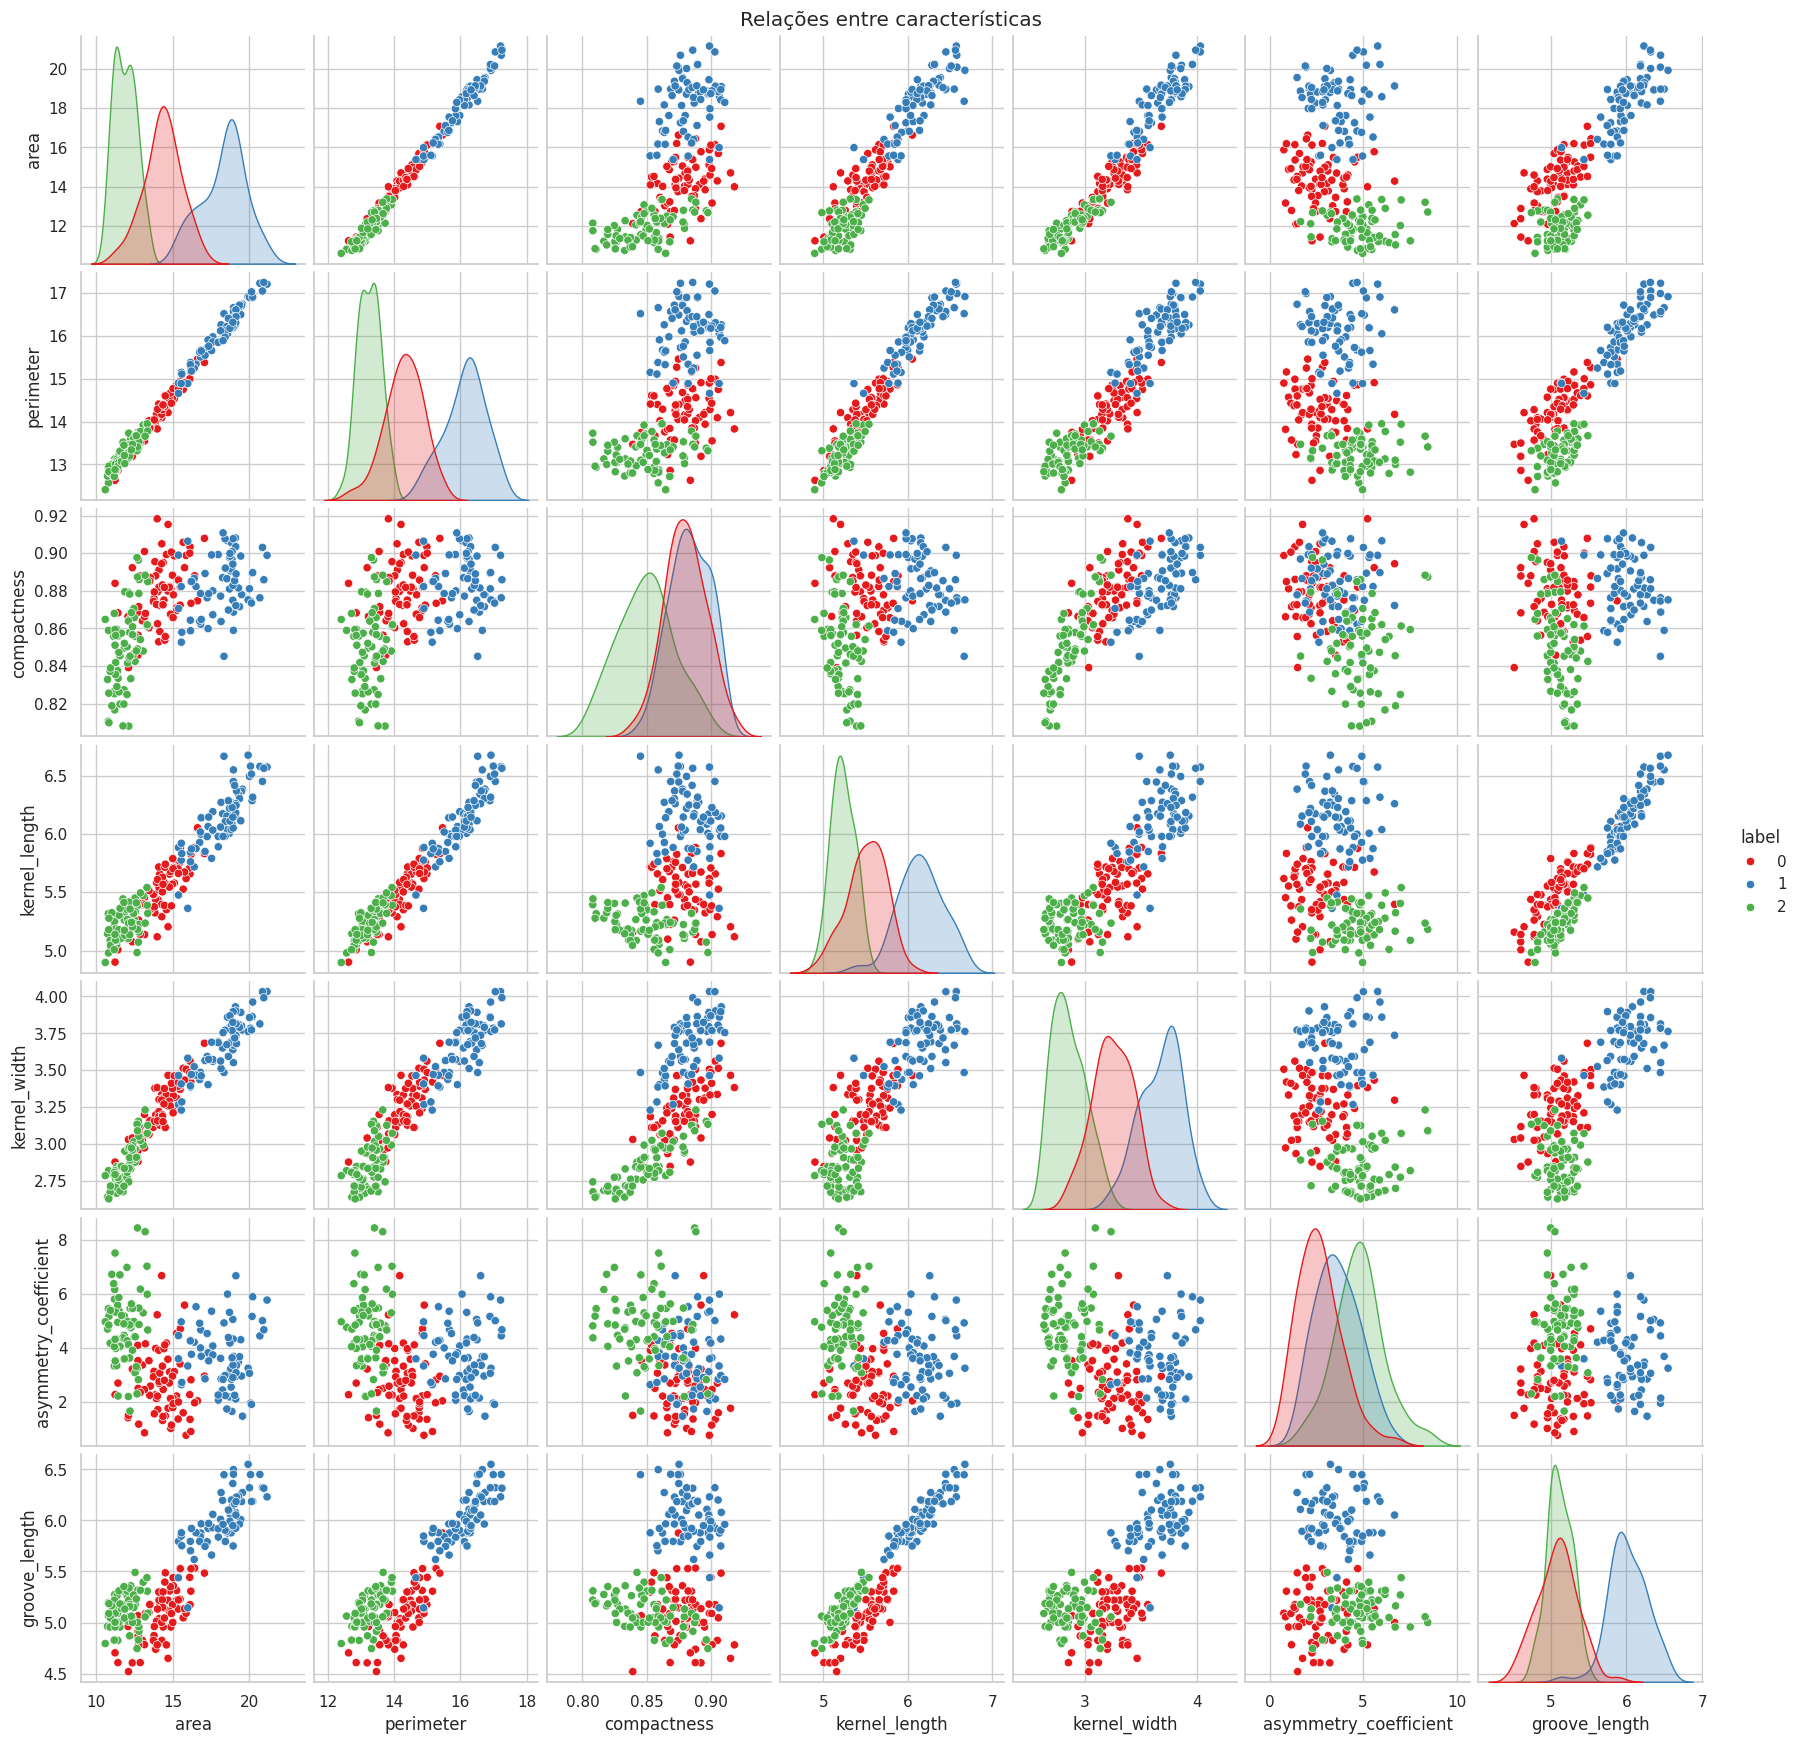

In [14]:
sns.pairplot(df, hue='label', palette='Set1')
plt.suptitle("Relações entre características", y=1)
plt.show()

In [22]:
print('Missing Values \n')
print(df.isnull().sum())

X = df.drop('label', axis=1)
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing Values 

area                     0
perimeter                0
compactness              0
kernel_length            0
kernel_width             0
asymmetry_coefficient    0
groove_length            0
label                    0
dtype: int64


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       1.00      0.95      0.98        21
           2       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Confusion Matrix:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       1.00      0.95      0.98        21
           2       0.91      0.91      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

Confusion Matrix:
[[18  0  2]
 [ 1 20  0]
 [ 2  0 20]]

Random Forest Classification Report:
              precision    recall 

In [24]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor acurácia:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Melhores parâmetros: {'C': 1, 'kernel': 'linear'}
Melhor acurácia: 0.9593103448275861
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       1.00      0.95      0.98        21
           2       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63

